# Hyperparameters tuning

Need of Hyperparameter tuning

- Our models are fitted on perticular dataset, so we ma need to change the hyperparmeters on changing the datasets.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score 

import warnings
warnings.filterwarnings('ignore')



### 1. Loading Data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Preprocessing

In [3]:
df["Glucose"] = np.where(df["Glucose"]==0, df["Glucose"].median(), df["Glucose"])
df["Insulin"] = np.where(df["Insulin"]==0, df["Insulin"].median(), df["Insulin"])
df["SkinThickness"] = np.where(df["SkinThickness"]==0, df["SkinThickness"].median(), df["SkinThickness"])

### 3. Splitting into Features and Targets

In [4]:
x = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [5]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35.0,30.5,33.6,0.627,50
1,1,85.0,66,29.0,30.5,26.6,0.351,31
2,8,183.0,64,23.0,30.5,23.3,0.672,32
3,1,89.0,66,23.0,94.0,28.1,0.167,21
4,0,137.0,40,35.0,168.0,43.1,2.288,33


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### 4. Splitting into Train and Test

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=33)

### 5.  RandomForestClassifier model

In [8]:
rf = RandomForestClassifier(n_estimators=10)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)



### 6. Evaluating model

In [9]:
rf.score(x_test, y_test)

0.7467532467532467

In [10]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.92      0.82        99
           1       0.75      0.44      0.55        55

    accuracy                           0.75       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.75      0.75      0.73       154



<AxesSubplot:>

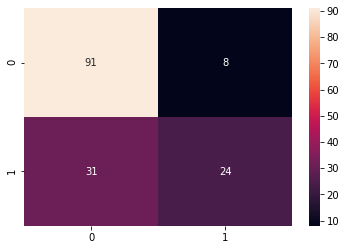

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Hyperparameter Tunning

## 1. Manual hyperparameter tuning 
Parameters are assigned based on our knowledge.

In [12]:
model = RandomForestClassifier(
                 n_estimators=500,
                 criterion = 'gini',
                 max_features = 'sqrt',
                 min_samples_leaf = 10,
                 random_state = 33
                 )

0.7467532467532467
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.75      0.92      0.82        99
           1       0.75      0.44      0.55        55

    accuracy                           0.75       154
   macro avg       0.75      0.68      0.69       154
weighted avg       0.75      0.75      0.73       154



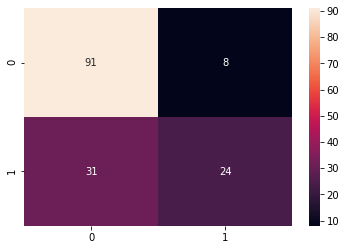

In [13]:
print(rf.score(x_test, y_test))
print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True))
print(classification_report(y_test, y_pred))

## 2. RandomizedSearchCV
Always use RandomizedsearchCV before GridSearchCV because RandomizedSearchCV will randomly select the parameters and check wheather they give better results or not; It just narrow down the parameters and then we can use GridSearchCV which thoroughly make and analyze each Permutation and combination and give results.

### Parameters in RandomizedSearchcv()
------------------------------------------------------
1. **`estimator`** = name of model forwhich we perform tuning.
2. **`param_distributions`** = dictionary of parameters as key and list of respective parameters as value is given from which best values of parameters are found.

3. **`n_iter`** - No. of iteratons randomizedSearchCV should perform so that best parametrs are obatined from those n number of Permutations and combinations. As RandomizedSearchCV does not perform thorough search with every possible Permutation, it only perform given no. of iteraions and pickup values randomly.

4. **`cv`** - Number of cross validation are the number of times train test split taken place sequentially.

5. **`verbose`**- It gives the displayed logs.

6. **`random_state`** - seed for randomising and creating the same permutations and combinations again.

7. **`n_jobs`** - How many cores of machine to use for calculations. (-1 implies maximum cores) 


**No of fits = (cv)(n_iter)**


In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

params = { 'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'criterion':['entropy','gini']}
print(params)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [15]:
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=100, cv=2, verbose=2, refit=True)

rf_randomcv.fit(x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END criterion=gini, max_depth=134, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1000; total time=   1.4s
[CV] END criterion=gini, max_depth=134, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=134, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=134, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=87, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=87, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimator

[CV] END criterion=gini, max_depth=103, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=118, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   1.5s
[CV] END criterion=gini, max_depth=118, max_features=log2, min_samples_leaf=1, min_samples_split=14, n_estimators=1000; total time=   1.5s
[CV] END criterion=entropy, max_depth=118, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=118, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=41, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.5s
[CV] END criterion=entropy, max_depth=41, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.5s
[CV] END criterion=gin

[CV] END criterion=gini, max_depth=87, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=600; total time=   0.9s
[CV] END criterion=gini, max_depth=118, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=118, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=103, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=800; total time=   1.2s
[CV] END criterion=entropy, max_depth=103, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=800; total time=   1.2s
[CV] END criterion=entropy, max_d

[CV] END criterion=gini, max_depth=41, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   0.9s
[CV] END criterion=entropy, max_depth=41, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END criterion=entropy, max_depth=41, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END criterion=gini, max_depth=72, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=800; total time=   1.1s
[CV] END criterion=gini, max_depth=72, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=800; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END criterion=gini, max_de

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 25, 41, 56, 72, 87,
                                                      103, 118, 134, 150],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [16]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 14,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 134,
 'criterion': 'entropy'}

In [18]:
y_pred = rf_randomcv.predict(x_test)

## Evaluation of RandomSearchCV

In [19]:
rf_randomcv.score(x_test, y_test)

0.7597402597402597

In [20]:
confusion_matrix(y_test, y_pred)

array([[85, 14],
       [23, 32]], dtype=int64)

In [22]:
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



## 3. GridSearchCV 

- RandomSearchCV gives the best values by randomly selecting the parameters, so we Search the parameters throughly using GridSearchCV.

- The List of paramters is given which areclose to the best parameters obtained from RandomSearchCV 

- We don't have number of iteration parameter in GridSearchcv as it Thoroughly checks all th possible permutations and combinations.

- **`param_distributions`** is replaced with **`param_grid`**

### Parameters in GridSearchcv()
------------------------------------------------------
1. **`estimator`** = name of model forwhich we perform tuning.

2. **`param_grid`** = dictionary of parameters as key and list of respective parameters as value is given from which best values of parameters are found.


4. **`cv`** - Number of cross validation are the number of times train test split taken place sequentially.

5. **`verbose`**- It gives the displayed logs.

6. **`random_state`** - seed for randomising and creating the same permutations and combinations again.

7. **`n_jobs`** - How many cores of machine to use for calculations. (-1 implies maximum cores) 


**No of fits = (Summation of Number of Elements in every parameters list)* CV**


In [23]:
from sklearn.model_selection import GridSearchCV

para = rf_randomcv.best_params_

param_grid = {
    'criterion': [para['criterion']],
    
    'max_depth': [para['max_depth']],
    
    'max_features': [para['max_features']],
    
    'min_samples_leaf': [para['min_samples_leaf'], 
                         para['min_samples_leaf']+2, 
                         para['min_samples_leaf'] + 4],
    
    'min_samples_split': [para['min_samples_split'] - 2,
                          para['min_samples_split'] - 1,
                          para['min_samples_split'], 
                          para['min_samples_split'] +1,
                          para['min_samples_split'] + 2],
    
    'n_estimators': [para['n_estimators'] - 200,
                     para['n_estimators'] - 100, 
                     para['n_estimators'], 
                     para['n_estimators'] + 100, 
                     para['n_estimators'] + 200]
}
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [134], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [200, 300, 400, 500, 600]}


In [24]:
rf = RandomForestClassifier()

rf_gridcv = GridSearchCV(estimator = rf, param_grid= param_grid, cv=10, n_jobs=-1, verbose=2, refit=True)

rf_gridcv.fit(x_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [134],
                         'max_features': ['log2'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [200, 300, 400, 500, 600]},
             verbose=2)

In [26]:
y_pred = rf_gridcv.predict(x_test)

In [27]:
rf_gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 134,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 15,
 'n_estimators': 600}

## Evaluation of GridSearchCV Model

In [28]:
rf_gridcv.score(x_train, y_train)

0.8745928338762216

In [29]:
confusion_matrix(y_test, y_pred)

array([[87, 12],
       [26, 29]], dtype=int64)

In [31]:
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        99
           1       0.71      0.53      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



# 3. Auto-Hyperparameters Tuning

Automated Hyperparameter Tuning can be done by using techniques such as 
- 1. Bayesian Optimization
- 2. Gradient Descent
- 3. Evolutionary Algorithms

Bayesian Optimisation
--------------------------------
#### 1. Bayesian Optimization
Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time.
In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.

- Objective Function = defines the loss function to minimize.
- Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
- Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.


In [32]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [34]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
        }
space

{'criterion': <hyperopt.pyll.base.Apply at 0x1ac3cbdc6a0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x1ac3cbd2cd0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x1ac3cbd2a00>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x1ac3cbd2d60>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x1ac3cbd28b0>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x1ac3c5a0ca0>}

In [ ]:
def objective(space):
    model = RandomForestClassifier()